In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
def mydata(path):
    airbnb=pd.read_csv('../Datasets/supervised/Regression/new-york-city-airbnb-open-data/AB_NYC_2019.csv')
    print('shape of my data is',airbnb.shape)
    print('\n\nInformation:\n')
    print(airbnb.info())
    print('\n\nMissing values:\n')
    print(airbnb.isnull().sum())
    print('\n\nDescription:\n')
    print(airbnb.describe())
    return airbnb

In [3]:
path ='../Datasets/supervised/Regression/new-york-city-airbnb-open-data/AB_NYC_2019.csv'
airbnb = mydata(path)

shape of my data is (48895, 16)


Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availa

Missing values ar epresent in features related to names and reviews which can be dropped from analysis as it does not affect house price prediction

In [4]:
# Removing duplicates if any present

airbnb.duplicated().sum()
airbnb.drop_duplicates(inplace=True)
airbnb.shape

(48895, 16)

In [5]:
# Run this cell only once

airbnb.drop(['name','id','host_name','last_review','reviews_per_month'], axis=1, inplace=True)

In [6]:
print(airbnb.shape)

(48895, 11)


In [7]:
# No null values i our dataset 

airbnb.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [8]:
list(airbnb.columns)

['host_id',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'calculated_host_listings_count',
 'availability_365']

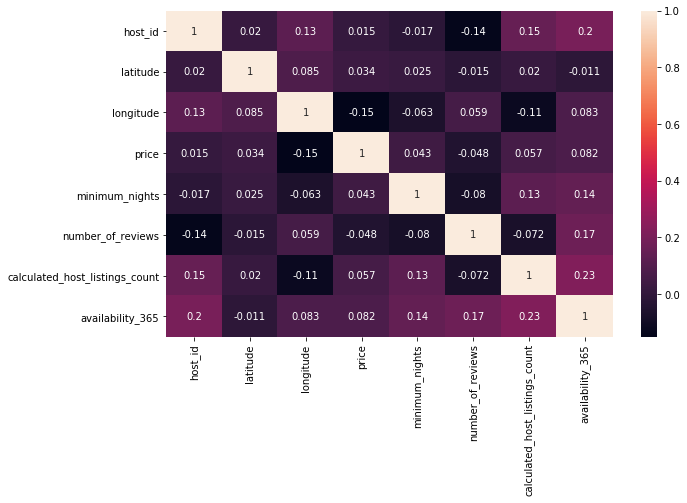

In [9]:
plt.figure(figsize = (10,6))
sns.heatmap(airbnb.corr(), annot = True, )

In [10]:
airbnb.head(10)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
5,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,1,129
6,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,1,0
7,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,1,220
8,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,1,0
9,7549,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,4,188


# Data Visualization

In [11]:
'''sns.pairplot(data = airbnb)'''

'sns.pairplot(data = airbnb)'

In [12]:
# Interesting categorical variables and their unique values

[print('Unique values for {0} are \n\n{1}\n\n\n\n'.format(i,airbnb[i].unique())) for i in airbnb if airbnb[i].dtype == 'O']

Unique values for neighbourhood_group are 

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']




Unique values for neighbourhood are 

['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Cobble Hill'
 'Flushing' 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George' 'Highbridge'
 'Financial District' 'Ridgewood' 'Morningside Heights' 'Jamaica'
 'Middle Village' 'NoHo' 'Ditmars Steinway' 'Flatiron District'
 'Roosevelt Island' 'Greenwich Village' 'Little Italy' 'East Flatbush'
 'Tompkinsville' 'Astoria' 'Claso

[None, None, None]

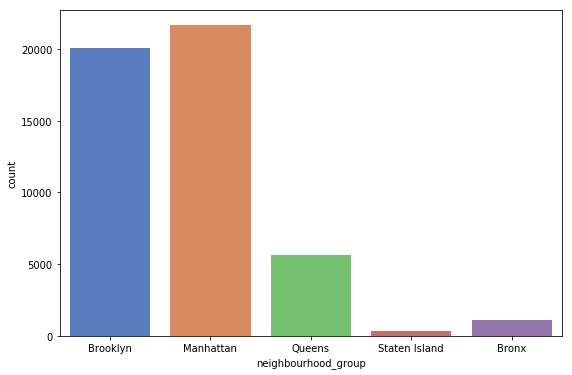

In [13]:
# Plotting all neighbourhood

fig, ax = plt.subplots(figsize = (9,6))
ax = sns.countplot(airbnb['neighbourhood_group'], palette = 'muted')

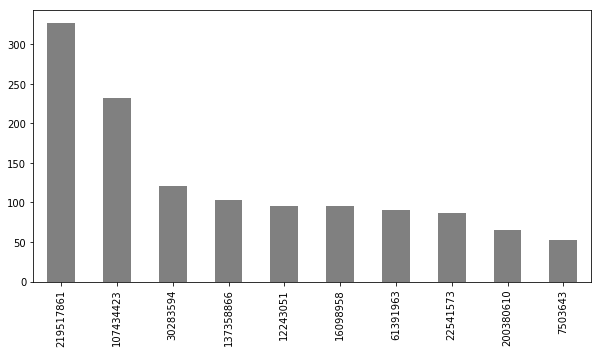

In [14]:
top_hosts = airbnb['host_id'].value_counts().head(10)
gif, ax = plt.subplots(figsize = (10,5))
top_hosts.plot(kind = 'bar', ax = ax, color='grey')

# Top host is having more than 300 listings

In [15]:
'''sns.countplot(airbnb['neighbourhood'], palette = 'plasma')
fig = plt.gcf()
fig.set_size_inches((25,10))'''

"sns.countplot(airbnb['neighbourhood'], palette = 'plasma')\nfig = plt.gcf()\nfig.set_size_inches((25,10))"

Text(0, 0.5, 'Total listings')

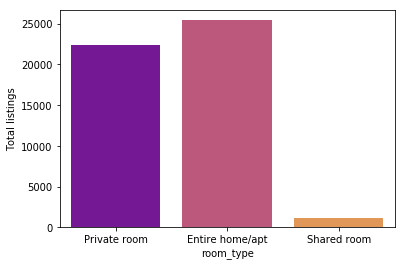

In [16]:
sns.countplot(airbnb.room_type, palette = 'plasma')
fig = plt.gca()
fig.set_ylabel('Total listings')

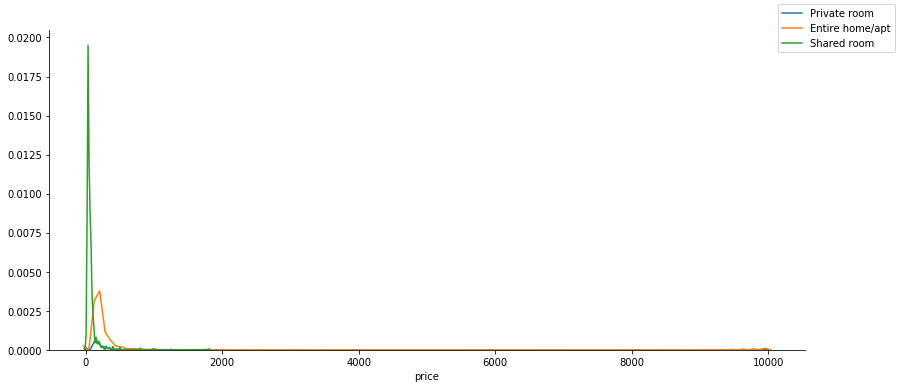

In [17]:
a = sns.FacetGrid(hue = 'room_type', data = airbnb)
a.map(sns.kdeplot, 'price')
fig = plt.gcf()
fig.legend()
fig.set_size_inches((15,6))

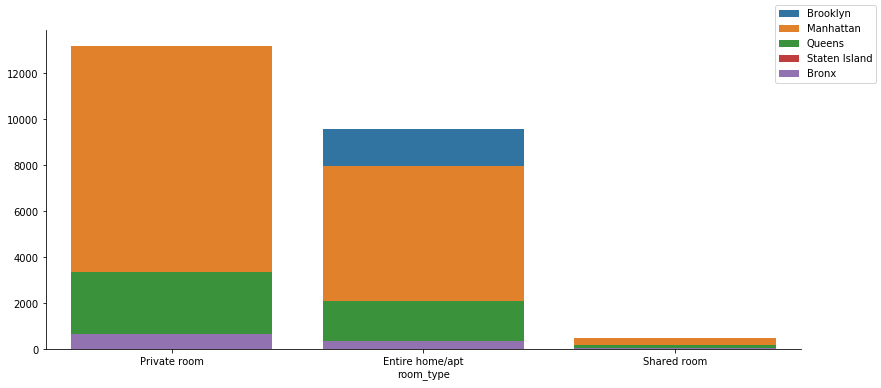

In [18]:
a = sns.FacetGrid(hue = 'neighbourhood_group', data = airbnb)
a.map(sns.countplot, 'room_type')
fig = plt.gcf()
fig.legend()
fig.set_size_inches((15,6))

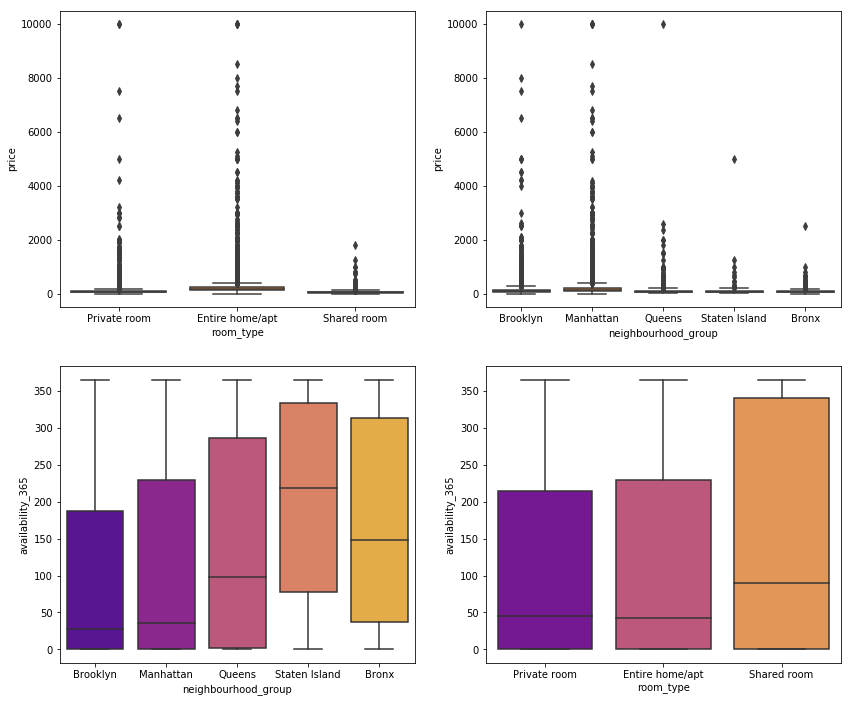

In [19]:
fig, ax = plt.subplots(2, 2, figsize = (14,12))
sns.boxplot(x = 'room_type', y = 'price', data = airbnb, ax = ax[0,0])

sns.boxplot(x = 'neighbourhood_group', y = 'price', data = airbnb, ax = ax[0,1])

sns.boxplot(data=airbnb, x='neighbourhood_group',y='availability_365',palette='plasma', ax =ax[1,0])

sns.boxplot(data=airbnb, x='room_type',y='availability_365',palette='plasma', ax =ax[1,1])

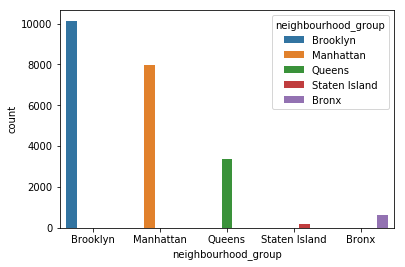

In [20]:
sns.countplot(x = 'neighbourhood_group', data = airbnb[airbnb['room_type']  == "Private room"], hue = 'neighbourhood_group')


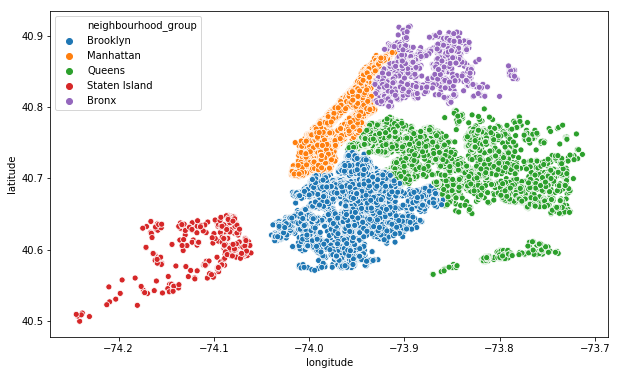

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.neighbourhood_group)


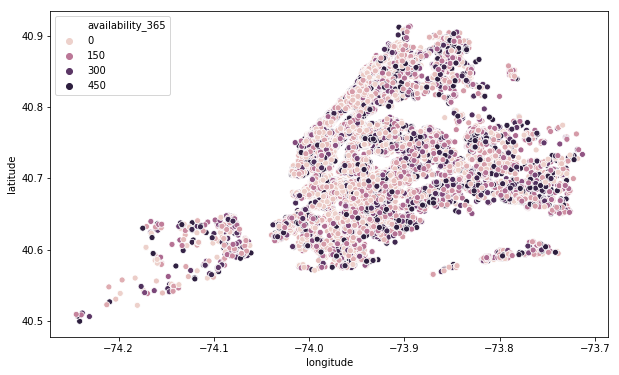

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.availability_365)
plt.ioff()

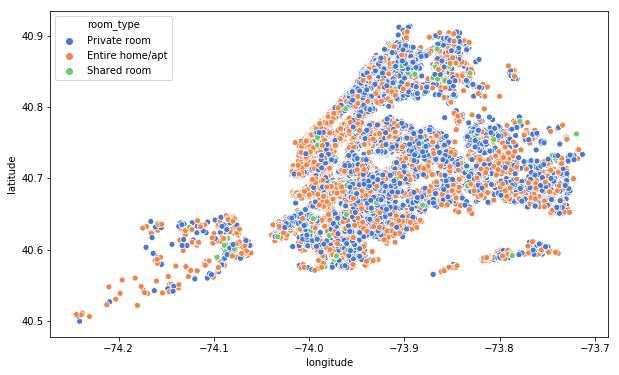

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.room_type, palette = 'muted')
plt.ioff()

In [24]:
mask = airbnb.room_type == 'Entire home/apt'


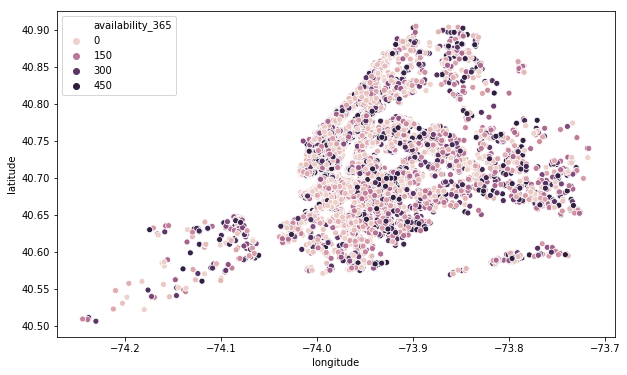

In [25]:
plt.figure(figsize=(10,6))

sns.scatterplot(airbnb[mask].longitude,airbnb[mask].latitude,hue=airbnb[(mask)].availability_365)


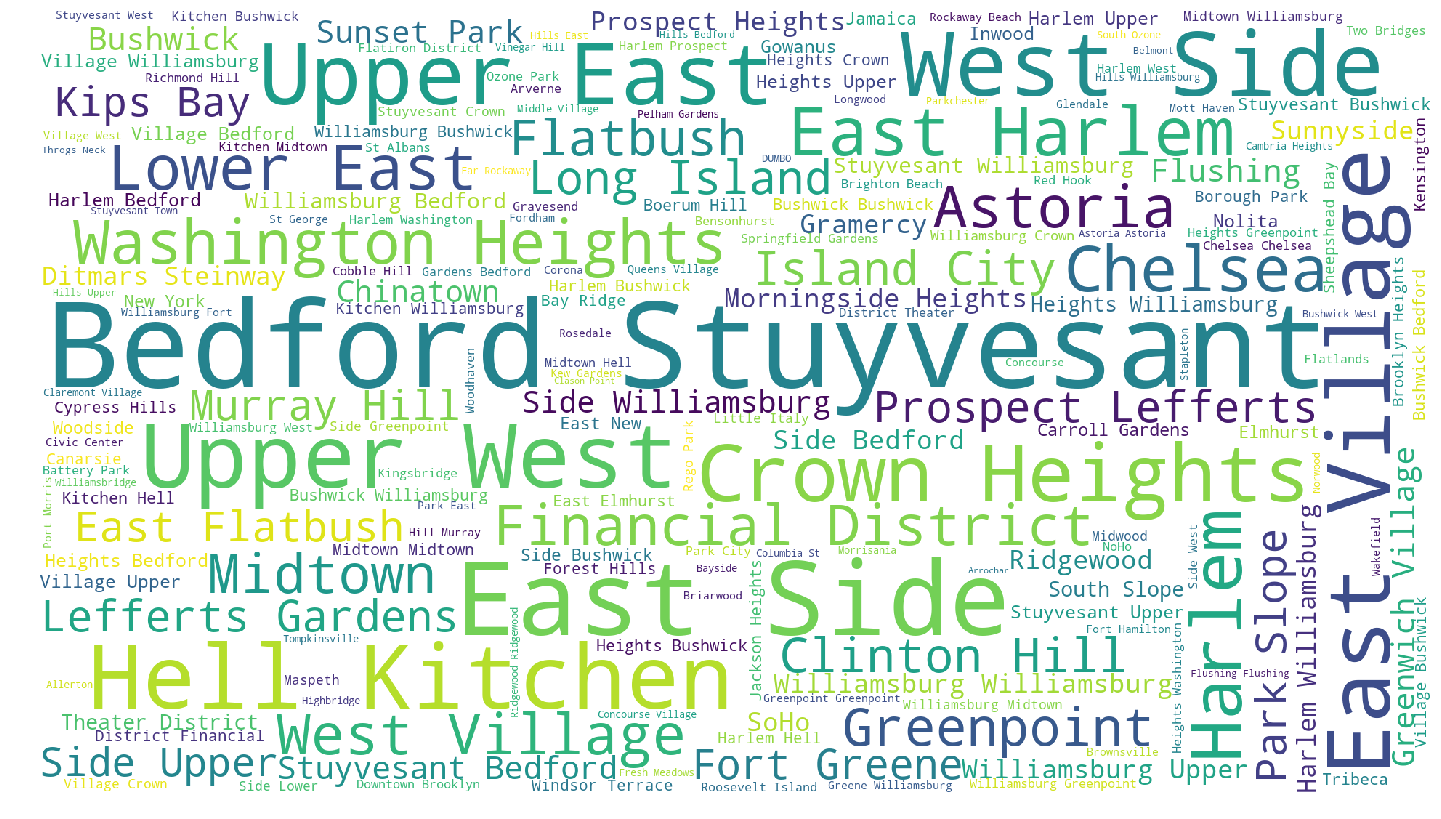

In [26]:
plt.subplots(figsize=(25,15))
!pip install wordcloud
from wordcloud import WordCloud
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(airbnb.neighbourhood))

plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

# Regression

In [27]:
airbnb.drop(['host_id','latitude','longitude','neighbourhood','number_of_reviews'], axis=1, inplace=True)

airbnb.head(5)

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,6,365
1,Manhattan,Entire home/apt,225,1,2,355
2,Manhattan,Private room,150,3,1,365
3,Brooklyn,Entire home/apt,89,1,1,194
4,Manhattan,Entire home/apt,80,10,1,0


In [34]:
# Categorical variables: neighbourhood_group and room type  needs to be encoded

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
label = LabelEncoder()
airbnb['neighbourhood_group_code'] = label.fit_transform(airbnb['neighbourhood_group'])
airbnb['room_type_code'] = label.fit_transform(airbnb['room_type'])


In [35]:
airbnb.head()

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group_code,room_type_code,price_code
0,Brooklyn,Private room,149,1,6,365,1,1,138
1,Manhattan,Entire home/apt,225,1,2,355,2,0,214
2,Manhattan,Private room,150,3,1,365,2,1,139
3,Brooklyn,Entire home/apt,89,1,1,194,1,0,78
4,Manhattan,Entire home/apt,80,10,1,0,2,0,69


Index(['neighbourhood_group_code', 'room_type_code', 'price'], dtype='object')

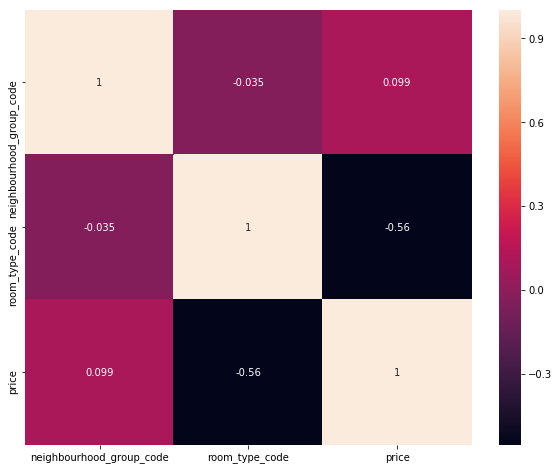

In [36]:
# Get Correlation between different variables

airbnb_en = airbnb[['neighbourhood_group_code', 'room_type_code', 'price']]
corr = airbnb_en.corr(method='kendall')
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)
airbnb_en.columns

In [37]:

from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.metrics import r2_score


In [38]:
train, test = train_test_split(airbnb_en, test_size = 0.1, random_state = 0)
train_X = train.iloc[:,[0,1]]
train_Y = train.iloc[:,2]
test_X = test.iloc[:,[0,1]]
test_Y = test.iloc[:,2]


In [43]:
model = [LinearRegression(), DecisionTreeRegressor()]
for i in model: 
    i.fit(train_X, train_Y)
    predict = i.predict(test_X)
    print('R square for ',i,'is', r2_score(test_Y, predict),'\n\n')
    print(LinearRegression.)

R square for  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False) is 0.05975146387103425 


R square for  DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best') is 0.08122971415167712 




Conclusion: It is confirmed from R squared value that we can not predict prices using given features. However, we can predict house prices with additional features like total area of listing, number of bathrooms, amenities etc.